# 📊 Dataset Information

**Note:** The dataset for this project is **not included in this repository** to keep the repository lightweight.  

You can download the dataset from **Kaggle** using the link below:  

[Download The Exam Score Prediction Dataset](https://www.kaggle.com/datasets/ayeshaseherr/exame-score-dataset/data)  

Please make sure to place the downloaded CSV file in the same directory as this notebook before running any code.

# Importing

## Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

/kaggle/input/exame-score-dataset/Exam_Score_Prediction.csv


## Import CSV And convert to DataFrame

In [2]:
df = pd.read_csv('Exam_Score_Prediction.csv')

# Preprocessing

## Frist five row

In [3]:
df.head()

,student_id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,1,17,male,diploma,2.78,92.9,yes,7.4,poor,coaching,low,hard,58.9
1,2,23,other,bca,3.37,64.8,yes,4.6,average,online videos,medium,moderate,54.8
2,3,22,male,b.sc,7.88,76.8,yes,8.5,poor,coaching,high,moderate,90.3
3,4,20,other,diploma,0.67,48.4,yes,5.8,average,online videos,low,moderate,29.7
4,5,20,female,diploma,0.89,71.6,yes,9.8,poor,coaching,low,moderate,43.7


## last Five row

In [4]:
df.tail()

,student_id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
19995,19997,18,other,bba,6.50,71.3,yes,5.0,good,self-study,low,easy,86.5
19996,19998,18,male,b.com,3.71,41.6,no,5.9,average,coaching,medium,moderate,60.9
19997,19999,19,other,diploma,7.88,68.2,yes,4.6,poor,group study,low,easy,64.5
19998,20000,19,male,bba,4.60,76.3,no,6.1,good,self-study,medium,moderate,79.0
19999,20001,20,male,b.sc,7.50,47.9,yes,7.5,poor,coaching,medium,moderate,71.0


## Shape of our dataset

In [5]:
df.shape

(20000, 13)

## List out all columns

In [6]:
df.columns

Index(['student_id', 'age', 'gender', 'course', 'study_hours',
       'class_attendance', 'internet_access', 'sleep_hours', 'sleep_quality',
       'study_method', 'facility_rating', 'exam_difficulty', 'exam_score'],
      dtype='object')

## Datatype of each columns

In [7]:
df.dtypes

student_id            int64
age                   int64
gender               object
course               object
study_hours         float64
class_attendance    float64
internet_access      object
sleep_hours         float64
sleep_quality        object
study_method         object
facility_rating      object
exam_difficulty      object
exam_score          float64
dtype: object

## Information of all Columns

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   student_id        20000 non-null  int64  
 1   age               20000 non-null  int64  
 2   gender            20000 non-null  object 
 3   course            20000 non-null  object 
 4   study_hours       20000 non-null  float64
 5   class_attendance  20000 non-null  float64
 6   internet_access   20000 non-null  object 
 7   sleep_hours       20000 non-null  float64
 8   sleep_quality     20000 non-null  object 
 9   study_method      20000 non-null  object 
 10  facility_rating   20000 non-null  object 
 11  exam_difficulty   20000 non-null  object 
 12  exam_score        20000 non-null  float64
dtypes: float64(4), int64(2), object(7)
memory usage: 2.0+ MB


## Check Null Value

In [9]:
df.isnull().sum()

student_id          0
age                 0
gender              0
course              0
study_hours         0
class_attendance    0
internet_access     0
sleep_hours         0
sleep_quality       0
study_method        0
facility_rating     0
exam_difficulty     0
exam_score          0
dtype: int64

## Drop student_id Column

In [10]:
df = df.drop('student_id', axis=1)

## Check Dupicate Value

In [11]:
df.duplicated().sum()

0

## Summary

In [12]:
df.describe()

,age,study_hours,class_attendance,sleep_hours,exam_score
count,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000
mean,20.473300,4.007603,70.017365,7.00856,62.513225
std,2.284458,2.308313,17.282262,1.73209,18.908491
min,17.000000,0.080000,40.600000,4.10000,19.599000
25%,18.000000,2.000000,55.100000,5.50000,48.800000
50%,20.000000,4.040000,69.900000,7.00000,62.600000
75%,22.000000,6.000000,85.000000,8.50000,76.300000
max,24.000000,7.910000,99.400000,9.90000,100.000000


# EDA

In [13]:
def show_fig():
    plt.tight_layout()
    plt.show()

plot_no = 1

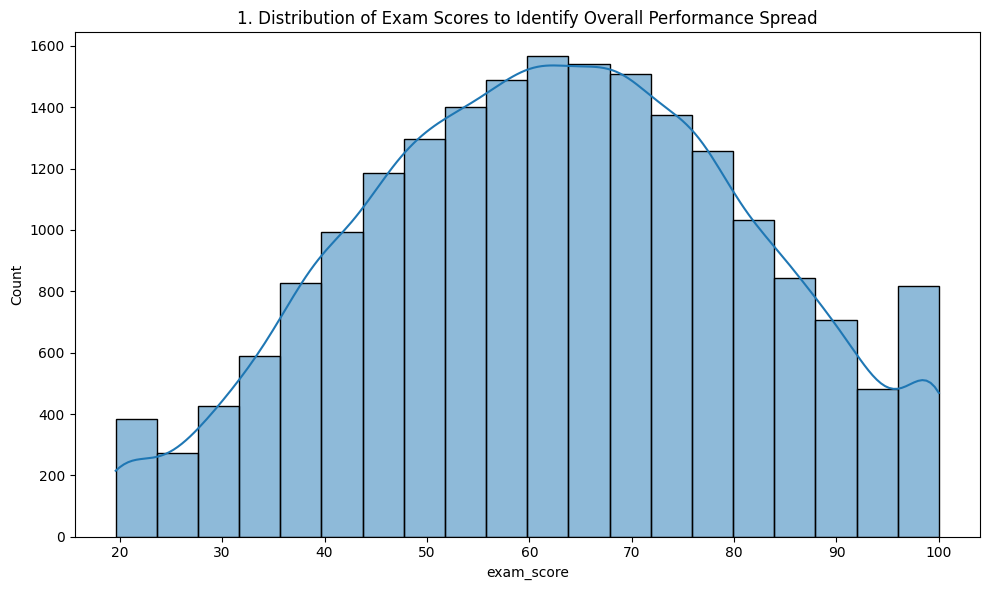

In [14]:
fig = plt.figure(figsize=(10,6))
sns.histplot(df['exam_score'], bins=20, kde=True)
plt.title(f'{plot_no}. Distribution of Exam Scores to Identify Overall Performance Spread')
show_fig()
plot_no += 1


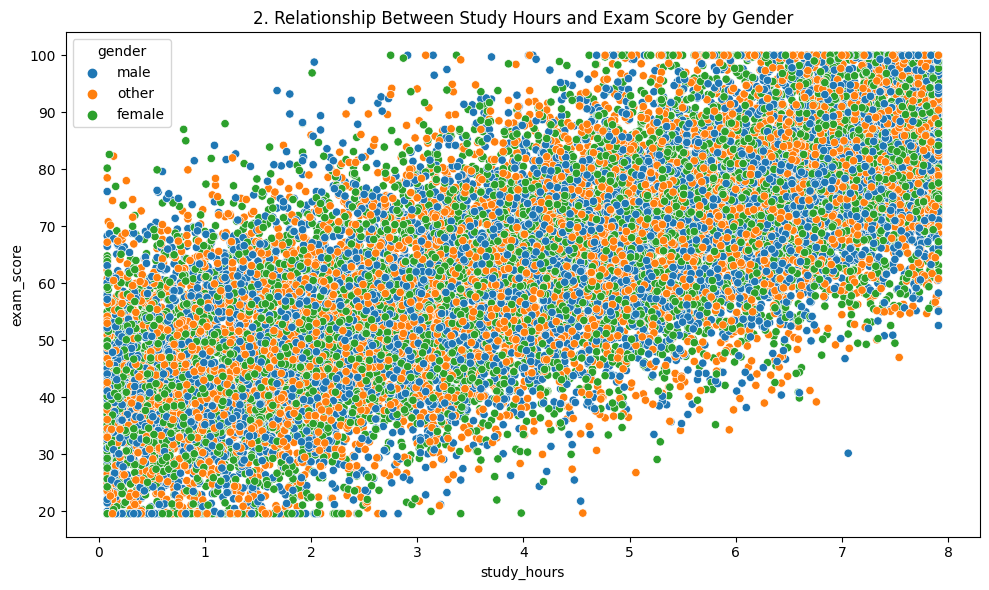

In [15]:
fig = plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='study_hours', y='exam_score', hue='gender')
plt.title(f'{plot_no}. Relationship Between Study Hours and Exam Score by Gender')
show_fig()
plot_no += 1


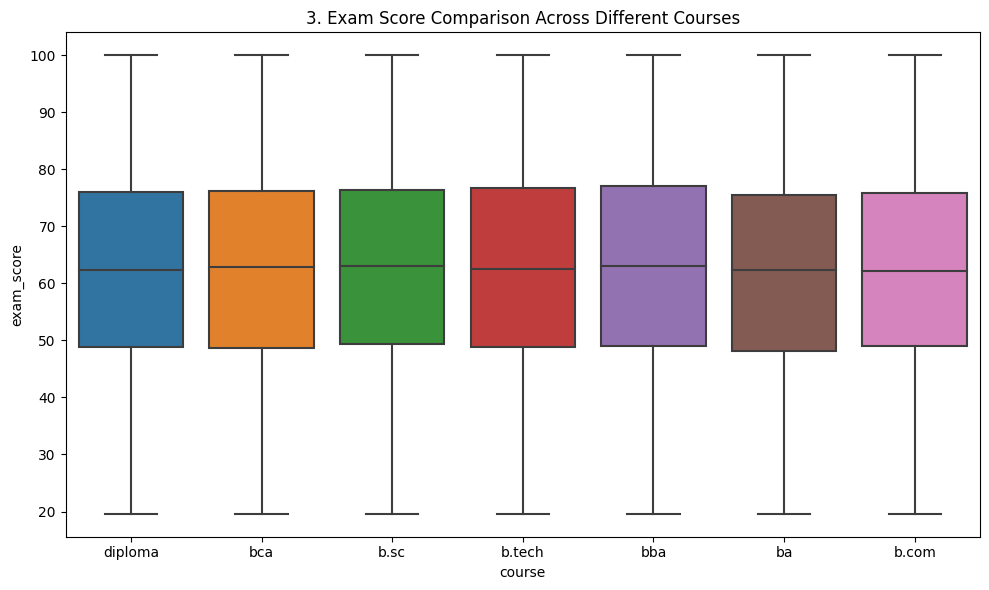

In [16]:
fig = plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='course', y='exam_score')
plt.title(f'{plot_no}. Exam Score Comparison Across Different Courses')
show_fig()
plot_no += 1


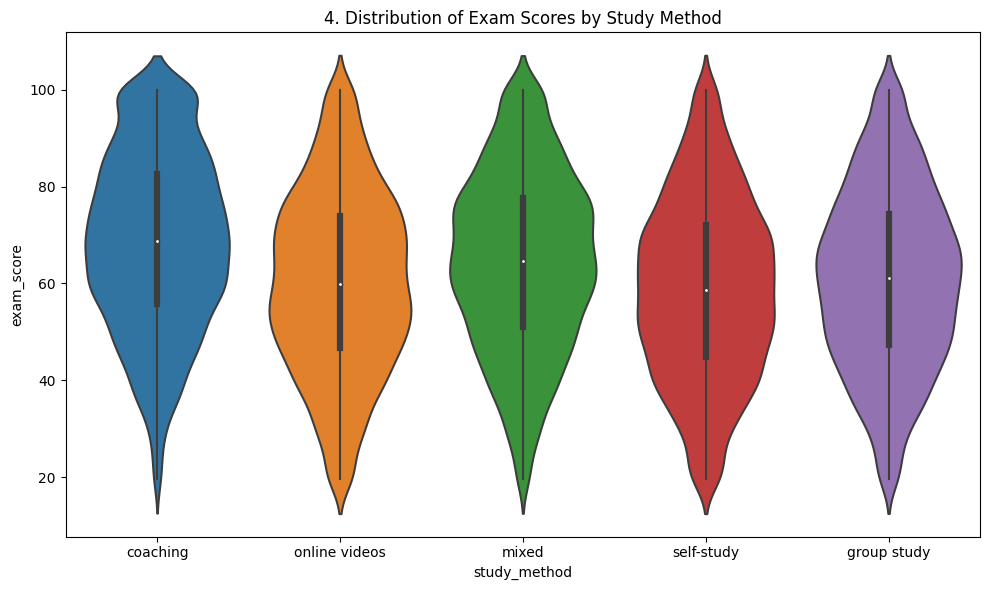

In [17]:
fig = plt.figure(figsize=(10,6))
sns.violinplot(data=df, x='study_method', y='exam_score')
plt.title(f'{plot_no}. Distribution of Exam Scores by Study Method')
show_fig()
plot_no += 1


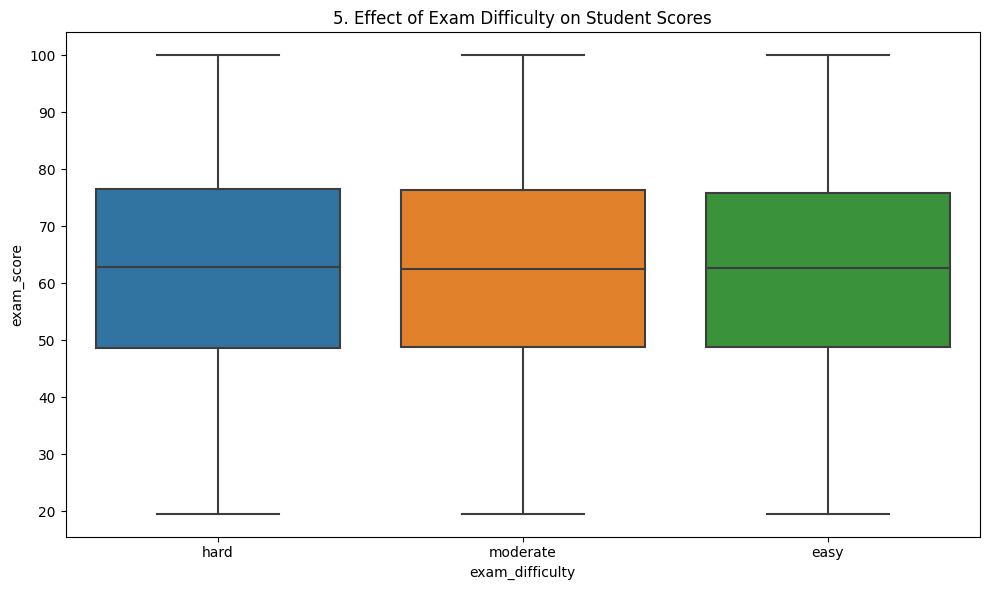

In [18]:
fig = plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='exam_difficulty', y='exam_score')
plt.title(f'{plot_no}. Effect of Exam Difficulty on Student Scores')
show_fig()
plot_no += 1


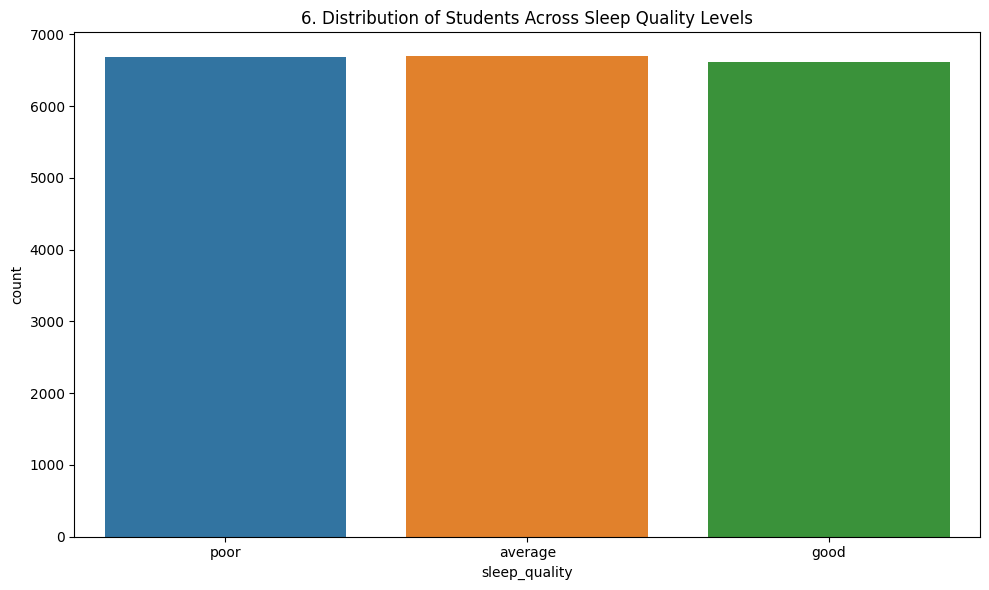

In [19]:
fig = plt.figure(figsize=(10,6))
sns.countplot(data=df, x='sleep_quality')
plt.title(f'{plot_no}. Distribution of Students Across Sleep Quality Levels')
show_fig()
plot_no += 1


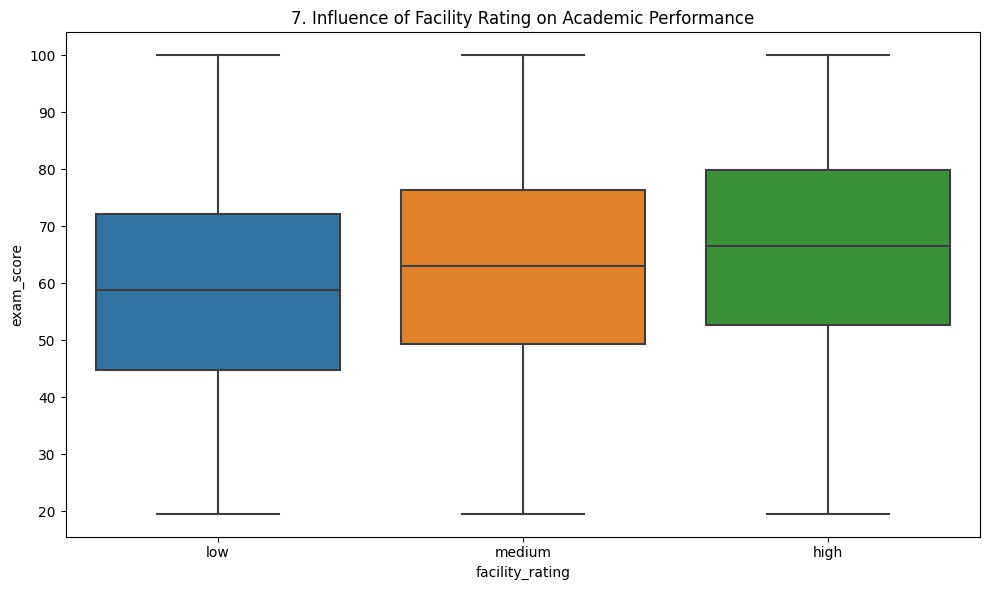

In [20]:
fig = plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='facility_rating', y='exam_score')
plt.title(f'{plot_no}. Influence of Facility Rating on Academic Performance')
show_fig()
plot_no += 1


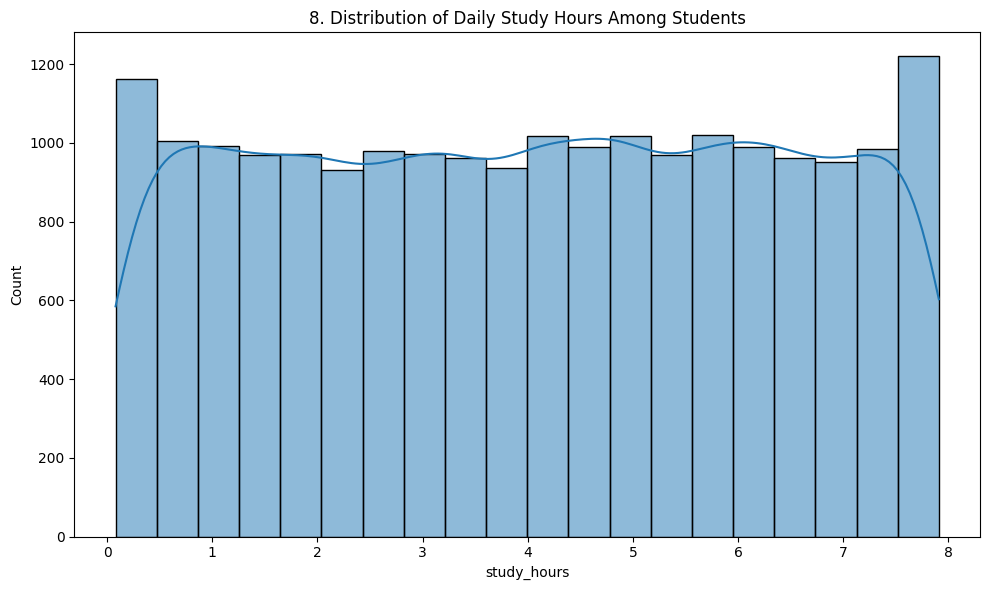

In [21]:
fig = plt.figure(figsize=(10,6))
sns.histplot(df['study_hours'], bins=20, kde=True)
plt.title(f'{plot_no}. Distribution of Daily Study Hours Among Students')
show_fig()
plot_no += 1


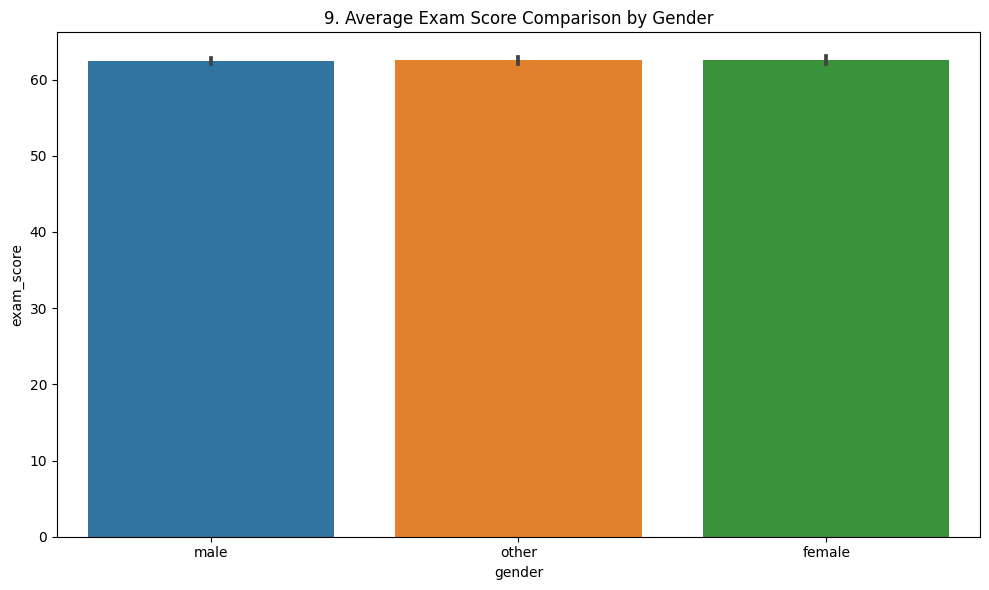

In [22]:
fig = plt.figure(figsize=(10,6))
sns.barplot(data=df, x='gender', y='exam_score', estimator='mean')
plt.title(f'{plot_no}. Average Exam Score Comparison by Gender')
show_fig()
plot_no += 1


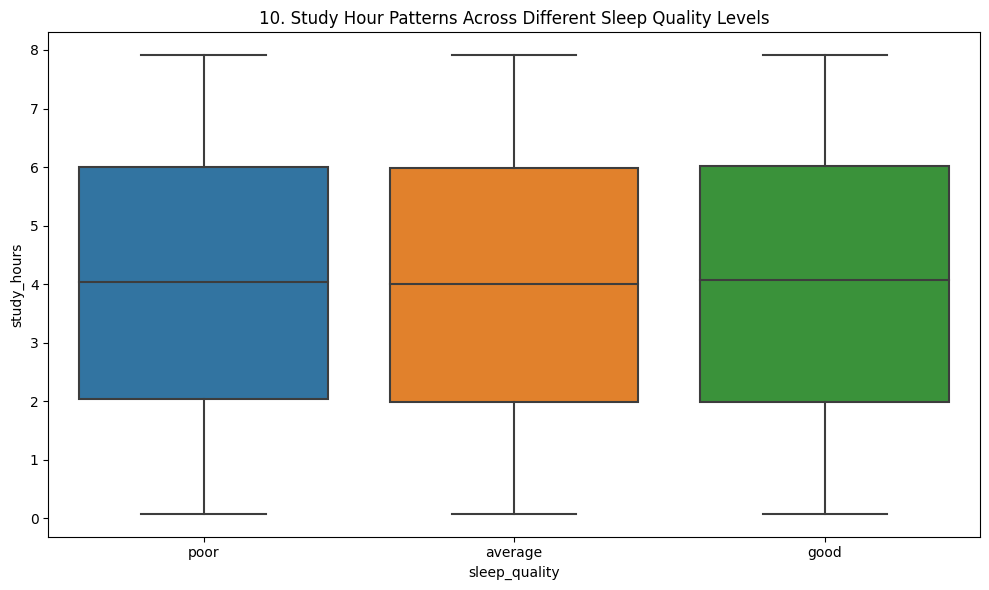

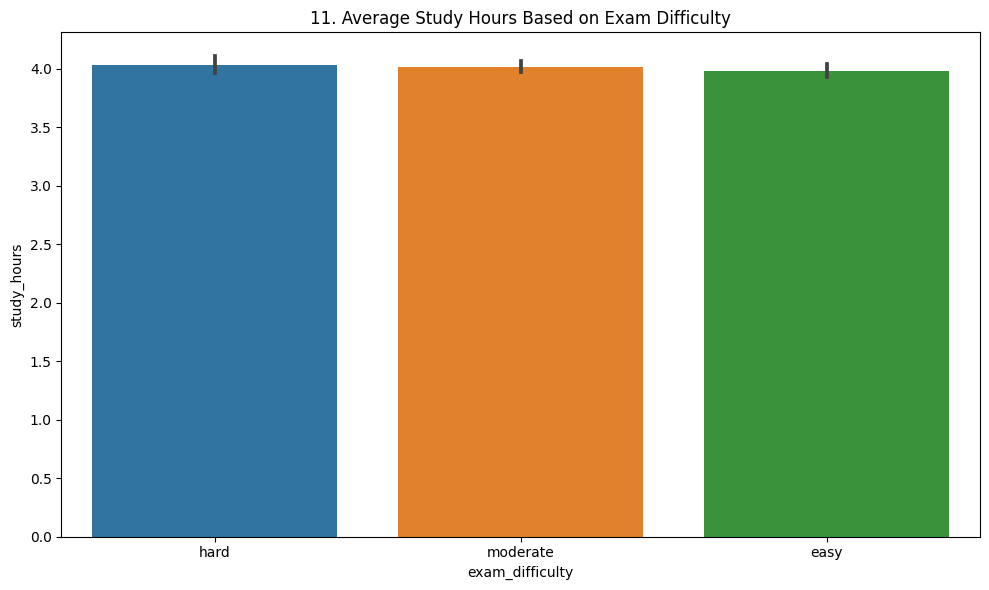

In [23]:
fig = plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='sleep_quality', y='study_hours')
plt.title(f'{plot_no}. Study Hour Patterns Across Different Sleep Quality Levels')
show_fig()
plot_no += 1
fig = plt.figure(figsize=(10,6))
sns.barplot(data=df, x='exam_difficulty', y='study_hours', estimator='mean')
plt.title(f'{plot_no}. Average Study Hours Based on Exam Difficulty')
show_fig()
plot_no += 1


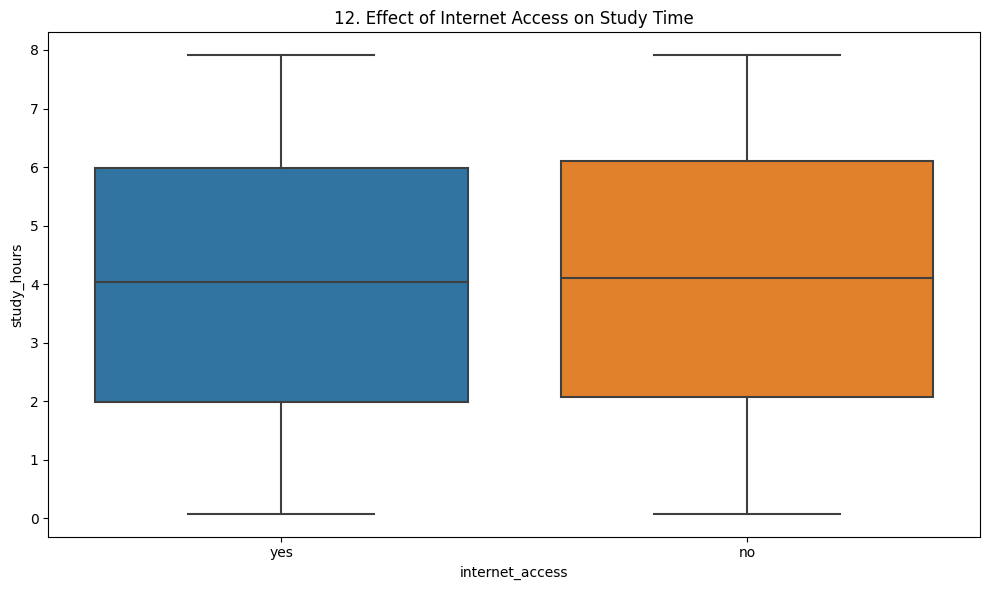

In [24]:
fig = plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='internet_access', y='study_hours')
plt.title(f'{plot_no}. Effect of Internet Access on Study Time')
show_fig()
plot_no += 1


# Train Model

## Create target variable for classification (Pass / Fail)

In [25]:
df['result'] = (df['exam_score'] >= 50).astype(int)

## Separate features and target

In [26]:
X = df.drop(['exam_score', 'result'], axis=1)
y = df['result']

## Encode categorical features

In [27]:
X = pd.get_dummies(X, drop_first=True)

## Train-test split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Train classification model

In [29]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

## Make predictions

In [30]:
y_pred = model.predict(X_test)

## Check model score

In [31]:
score = model.score(X_test, y_test)*100
print("Model Accuracy Score:", score)

Model Accuracy Score: 86.425


### We archive 86.43 Prediction Accureccy

## Confusion matrix

In [32]:
cm = confusion_matrix(y_test, y_pred)

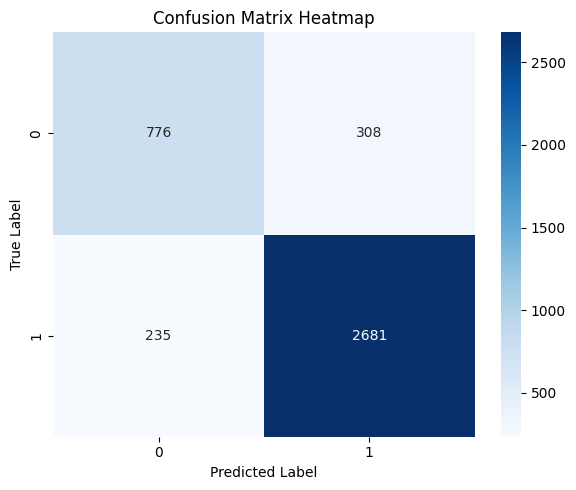

In [33]:
fig = plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()